#Project 1: Student Performance Analysis

Author: Isabel Ekwenibe
GitHub Repository Link: https://github.com/ne00040/Student-Performance-Analysis

## 1. Problem statement

Dataset: Students Performance in Exams (Kaggle)
- Link: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data 
- Rows & Columns: 1000 rows, 8 columns 
- Features: gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score  

Main Question: 
- What factors influence students’ academic performance in exams?

Sub-Questions: 
1. Do students who complete the test preparation course perform better on exams compared to those who do not?  
2. Are there differences in performance between male and female students across math, reading, and writing?  
3. How does parental level of education relate to student performance?   

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("StudentsPerformance.csv")

print("Shape (rows, columns):", df.shape)
print("\nColumn names:", df.columns.tolist())

df.head()

Shape (rows, columns): (1000, 8)

Column names: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 2. Data Cleaning

Steps:
1. Dropped unwanted features: `lunch` and `race/ethnicity` as it not needed for my analysis.  
2. Checked for missing values.  
3. Checked for duplicates.  
4. Verified the data types of all columns.  
5. For categorical variables, checked for inconsistent inputs.  
6. For numeric variables, checked for outliers and removed/replaced if necessary.  
7. Created helper columns:  
   - `total_score` = math + reading + writing  
   - `avg_score` = average of the three exam scores 


In [5]:
### 2.1 Drop unwanted features

df = df.drop(columns=["lunch", "race/ethnicity"])

df.head()

,gender,parental level of education,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,none,72,72,74
1,female,some college,completed,69,90,88
2,female,master's degree,none,90,95,93
3,male,associate's degree,none,47,57,44
4,male,some college,none,76,78,75


In [6]:
### 2.2 Missing values

df.isnull().sum()

gender                         0
parental level of education    0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
### 2.3 Duplicates

print("Any duplicates?:", df.duplicated().any())
print("Number of duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

df.head()

Any duplicates?: True
Number of duplicates: 2


,gender,parental level of education,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,none,72,72,74
1,female,some college,completed,69,90,88
2,female,master's degree,none,90,95,93
3,male,associate's degree,none,47,57,44
4,male,some college,none,76,78,75


In [8]:
### 2.4 Check data types

print(df.dtypes)

gender                         object
parental level of education    object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [9]:
### 2.5 Check categorical variables for inconsistent inputs

print("Unique values in gender:", df['gender'].unique())
print("Unique values in test preparation course:", df['test preparation course'].unique())
print("Unique values in parental level of education:", df['parental level of education'].unique())

Unique values in gender: ['female' 'male']
Unique values in test preparation course: ['none' 'completed']
Unique values in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [10]:
### 2.6 Check numeric variables for outliers (scores are 0–100)

score_cols = ['math score','reading score','writing score']
print(df[score_cols].describe())

outliers = df[(df[score_cols] < 0).any(axis=1) | (df[score_cols] > 100).any(axis=1)]
print("Out-of-range rows:", outliers.shape[0])

outliers

       math score  reading score  writing score
count  998.000000     998.000000     998.000000
mean    66.090180      69.156313      68.035070
std     15.178242      14.611918      15.204186
min      0.000000      17.000000      10.000000
25%     57.000000      59.000000      57.250000
50%     66.000000      70.000000      69.000000
75%     77.000000      79.000000      79.000000
max    100.000000     100.000000     100.000000
Out-of-range rows: 0


,gender,parental level of education,test preparation course,math score,reading score,writing score


In [11]:
### 2.7 Add helper columns

df['total_score'] = df[score_cols].sum(axis=1)
df['avg_score'] = df[score_cols].mean(axis=1)

df.head()

,gender,parental level of education,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,bachelor's degree,none,72,72,74,218,72.666667
1,female,some college,completed,69,90,88,247,82.333333
2,female,master's degree,none,90,95,93,278,92.666667
3,male,associate's degree,none,47,57,44,148,49.333333
4,male,some college,none,76,78,75,229,76.333333


## 3. Exploratory Data Analysis
### 3.1 Test Preparation

Question: Do students who complete the test preparation course perform better than those who do not?

In [12]:
test_prep = df.groupby('test preparation course')[['math score','reading score','writing score','avg_score']].mean()
test_prep

,math score,reading score,writing score,avg_score
test preparation course,,,,
completed,69.705882,73.893557,74.40056,72.666667
none,64.076443,66.517941,64.48986,65.028081


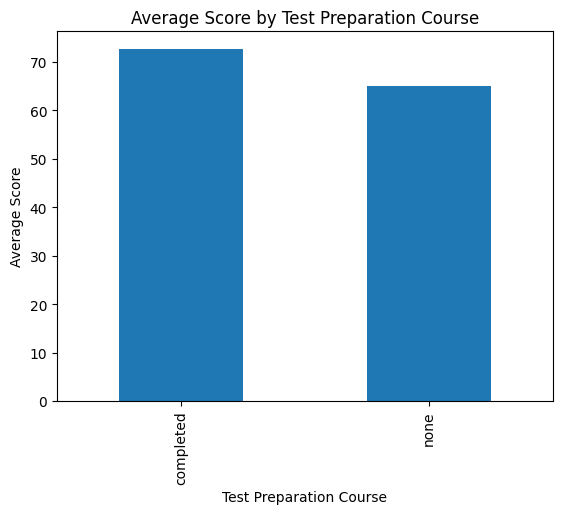

In [13]:
test_prep['avg_score'].plot(kind='bar')

plt.title("Average Score by Test Preparation Course")
plt.xlabel("Test Preparation Course")
plt.ylabel("Average Score")
plt.show()

Interpretation:  
- Students who completed the test preparation course scored higher on average than those who did not.  
- This suggests that test preparation may have a positive impact on performance.  

### 3.2 Gender

Question: Are there differences in performance between male and female students across math, reading, and writing?

In [14]:
gender = df.groupby('gender')[['math score','reading score','writing score']].mean()
gender

,math score,reading score,writing score
gender,,,
female,63.625969,72.596899,72.447674
male,68.728216,65.473029,63.311203


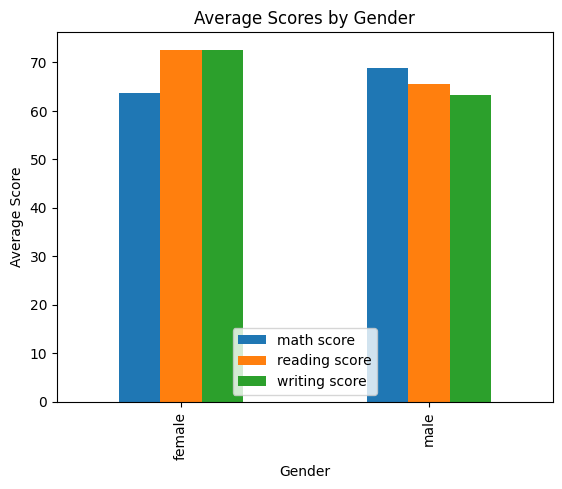

In [15]:
gender.plot(kind='bar')

plt.title("Average Scores by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Score")
plt.show()

Interpretation:
- The bar chart shows that on average, males score higher in math.  
- Females score higher in reading and writing.  
- This indicates some differences in performance between genders across the three subjects. 

### 3.3 Parental Level of Education vs Performance

Question: How does parental level of education relate to student performance?

In [16]:
parent_edu = df.groupby('parental level of education')[['math score','reading score','writing score','avg_score']].mean()
parent_edu_sorted = parent_edu.sort_values('avg_score', ascending=False)

parent_edu_sorted

,math score,reading score,writing score,avg_score
parental level of education,,,,
master's degree,69.745763,75.372881,75.677966,73.598870
bachelor's degree,69.418803,72.991453,73.316239,71.908832
associate's degree,67.895928,70.900452,69.877828,69.558069
some college,67.128319,69.460177,68.840708,68.476401
some high school,63.497207,66.938547,64.888268,65.108007
high school,62.137755,64.704082,62.448980,63.096939


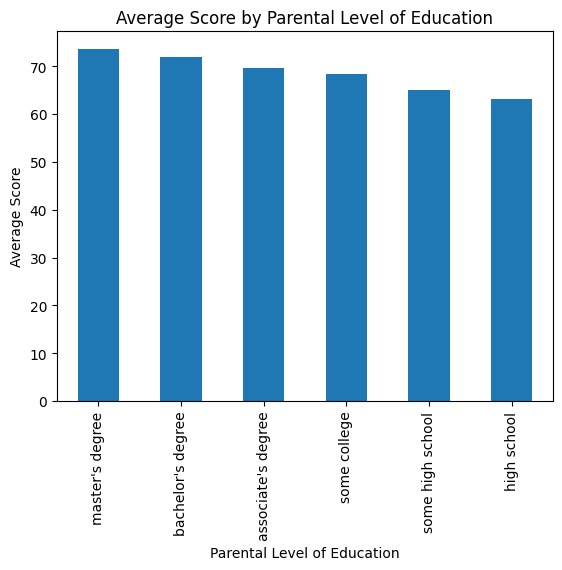

In [18]:
parent_edu_sorted['avg_score'].plot(kind='bar')

plt.title("Average Score by Parental Level of Education")
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Score")
plt.xticks(rotation=90)
plt.show()

Interpretation: 
- The bar chart shows that students with parents who completed higher levels of education (college, master’s degree) tend to score higher on average.  
- Students whose parents only completed high school or some college have lower average scores.  
- This suggests that parental education level may have an influence on student performance.  

## 4. Summary 

Key Findings:  
- Test preparation improves performance.  
- Gender differences exist: males excel in math, females in reading and writing.  
- Higher parental education is linked to better student scores.  

What I Failed to Find: 
- I could not analyze other factors such as lunch type or race/ethnicity since they were dropped.  

Next Steps: 
- Explore more datasets with additional features.  
- Try more visualization methods (histograms, stacked bars).  
- Apply statistical tests to check significance of differences. 